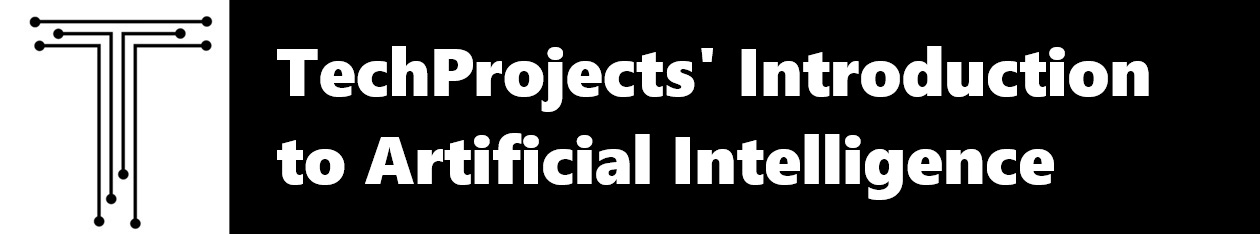

# 0. AI Basics

In this notebook, we'll go through the fundamentals of what Machine Learning and AI is. Next, you'll see the table of contents:

1. What is AI?
2. Types of AI
3. What is Machine Learning?
4. Neural Networks

## 0.1 What is AI?

AI (or Artificial Intelligence) is defined by the Cambridge Dictionary as "the use or study of computer systems or machines that have some of the qualities that the human brain has, such as the ability to interpret and produce language in a way that seems human, recognize or create images, solve problems, and learn from data supplied to them"

So in essence, AI aims to recreate how humans handle certain tasks and automating or improving on these.

AI is a broad field in computer science and includes from pathfinding to neural networks, and its usage may become ubiquitous in the following decades, as there are many innovative ideas coming up on the use of this technology.

So in the following Chapter, we'll talk about what types of AI exist and how you could use them for your project.

## 2. Types of AI

There are many types of AI in existance, but for brevity we'll focus on the following:

* Search
* Knowledge
* Uncertainty
* Optimization
* Learning
* Language

All code and documentation used for the following chapter has been extracted from Harvard's CS50AI Course, which you can check out on the following link: 

https://cs50.harvard.edu/ai/2023/

### Search

In Search we aim to find the fastest of best way to solve a problem. This problem could be Pathfinding (e.g. Directions for going from Boston to Providence), an AI to play against in games (e.g. AI which plays Chess or TicTacToe), etc.

As in this tutorials we'll focus more on the application and usage of such technologies, we'll skip most of the theoretical part, but you can still check it out here: https://cs50.harvard.edu/ai/2023/notes/0/

In short, these problems share several parts:
* An **Agent** (or "The Player")
* A **State** (or "The current state of the game")
* **Actions** (What actions can we take in the current state)
* **Transition Model** (How we go from one state to another)
* **State Space** (All possible States)

So let's jump into python and see how you'd represent these in an example:

**First let's import a custom library CS50 built for us. If you don't know that much python. Just think that it allows us to "create a maze" and use algorithms to solve it. What happens under the black box is not that relevant if you understand how it works**

In [1]:
from helper import Maze, StackFrontier, QueueFrontier, AStar

# We create a maze and give it a txt file, which you can check out (# are walls, A is starting position and B is the goal)

maze = Maze(filename="./data/Maze1.txt")

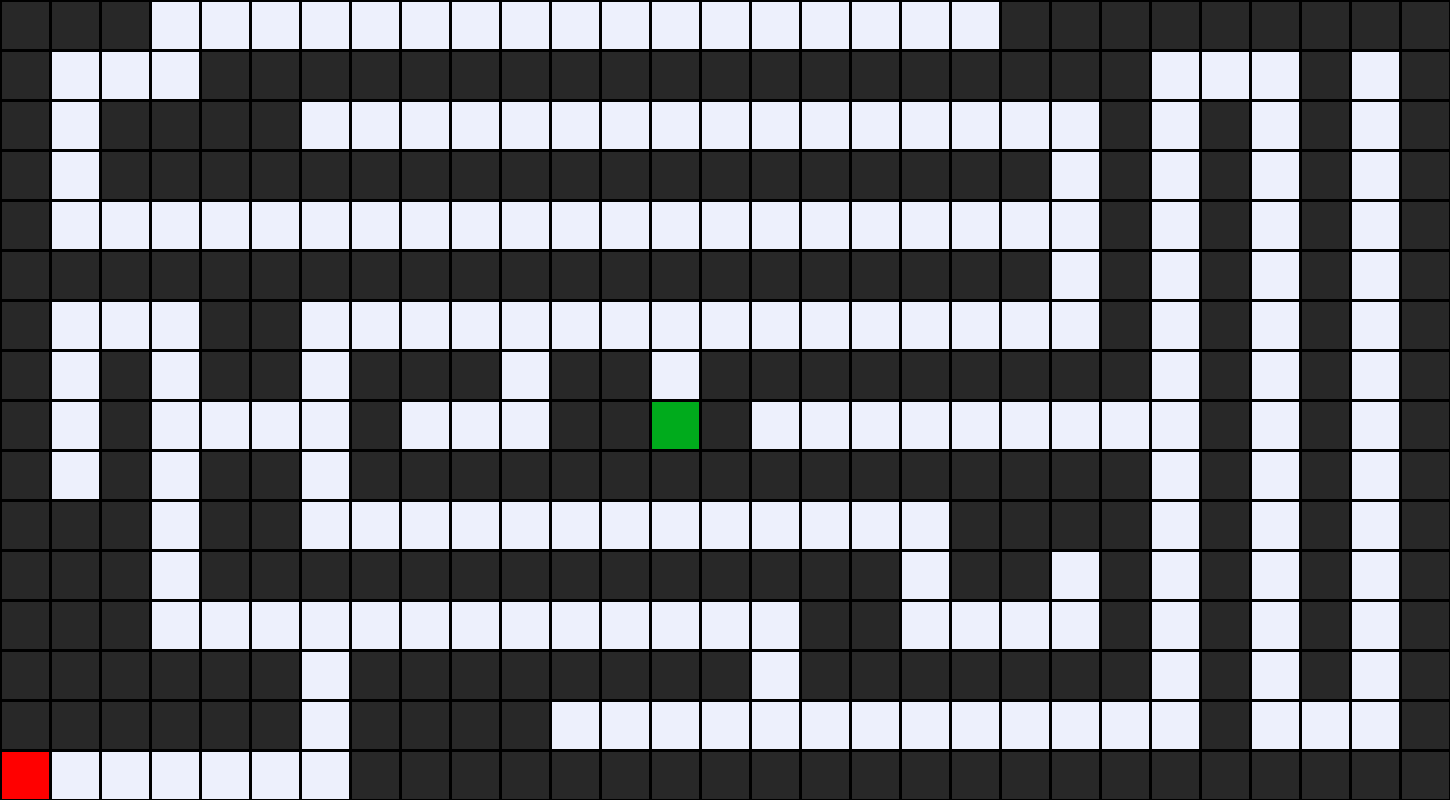

In [2]:
# We can check the maze layout first and see how it is
img = maze.output_image()
display(img)

Now let's solve it using what's called a stack frontier, that explores squares around it by "choosing" a path and following it until either it's a dead end or it finds the solution.

This would happen as follows:

1. Check neighboring squares to the position of the Agent:
    * If they were already explored, ignore them
    * If they are walls, store them as walls
    * If they're not walls, store them as a possible route
    * If it's the solution, stop and show the path in took to get there
2. Choose the **last** square analyzed that wasn't a wall and move there
3. Mark the past square as visited.
4. Repeat

In [3]:
maze.solve(model=StackFrontier)

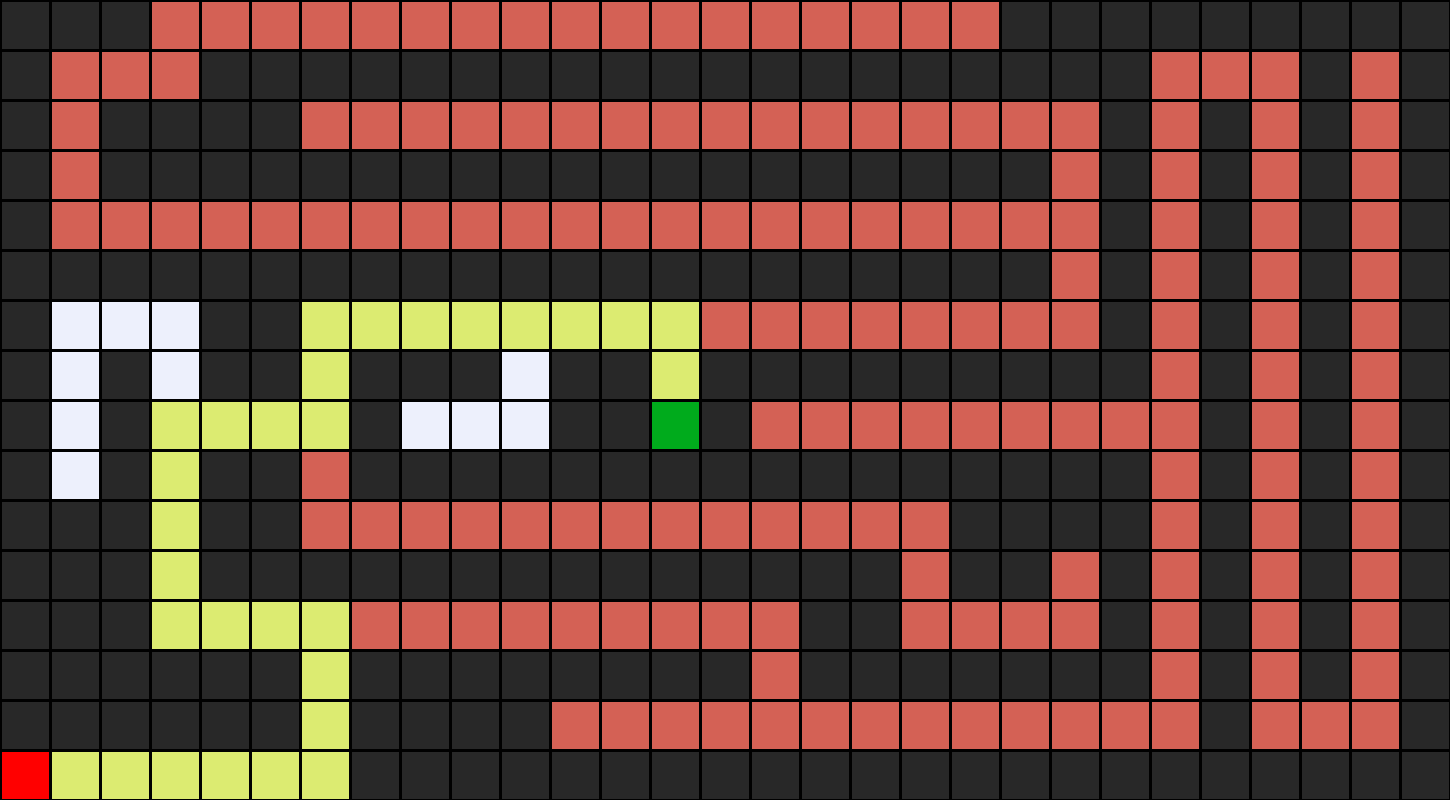

In [4]:
img = maze.output_image()
display(img)

The above image shows the path it took to get to the objective. Where the red squares are the squares that where explored but not part of the solution

Using a Queue Frontier is not that different as a Stack Frontier, but in step 2 from the steps explained above, instead of choosing the last square analyzed, it will choose the first one. So instead of a LiFo (Last In First Out) it will follow a FiFo (First In First Out).

* A LiFo works like this. Imagine you have a pile of blank papers on you desk that is refilled every week. a LiFo would pick up the paper on top always, so the bottom papers may never be used.
* A FiFo would choose the bottom paper on the stack, so we would be constantly removing the oldest paper

In [5]:
maze.solve(model=QueueFrontier)

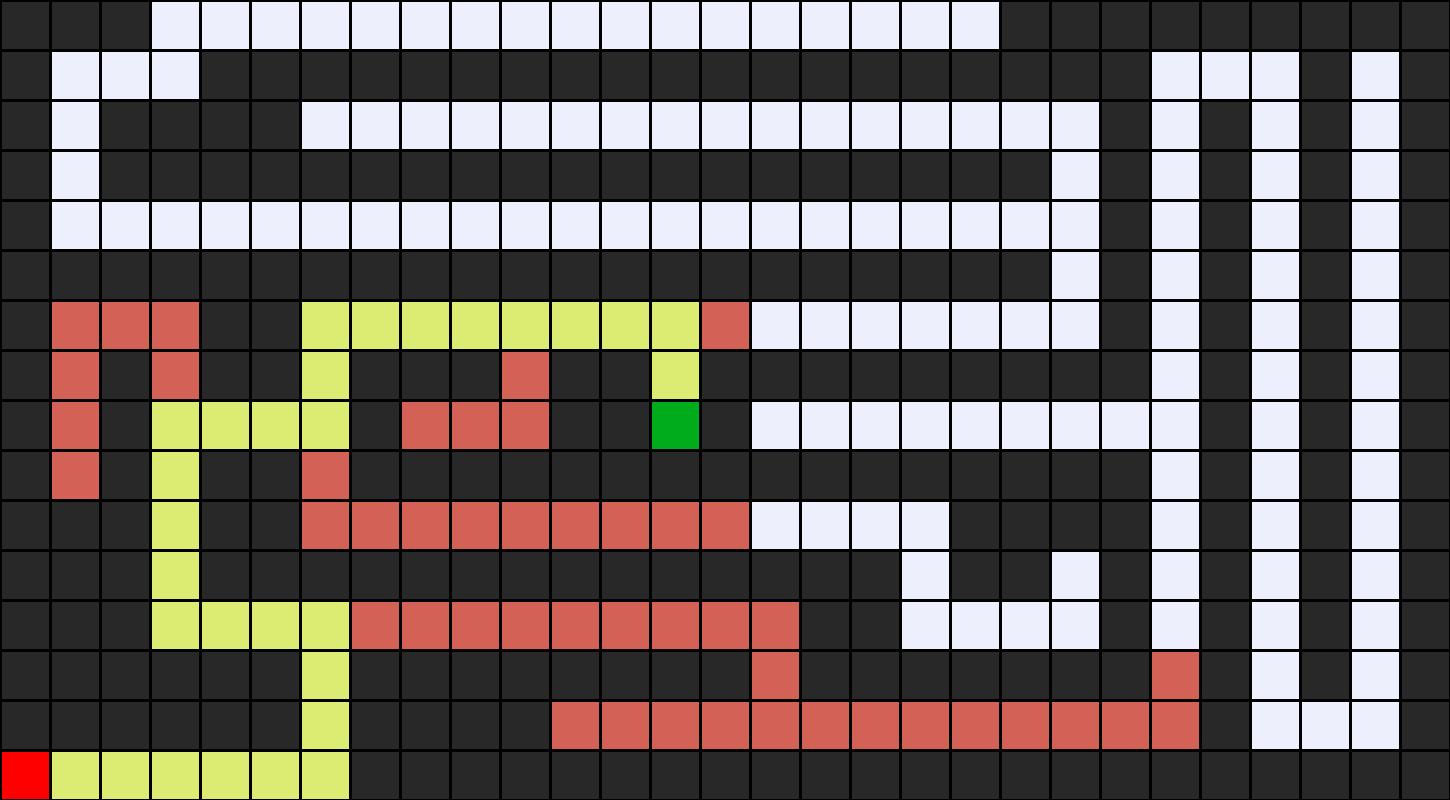

In [6]:
img = maze.output_image()
display(img)

In this case, a queue frontier looks like a better method as it explored less unecessary squares, but that's not always gonna be the best way.
As our last example of pathfinding, we'll show AStar (or A*) where instead of using LiFo or FiFo, it takes into account how far away the square would be from the goal and using a cost function as well. so it incentivizes shorter paths.

In [8]:
maze.solve(model=AStar)

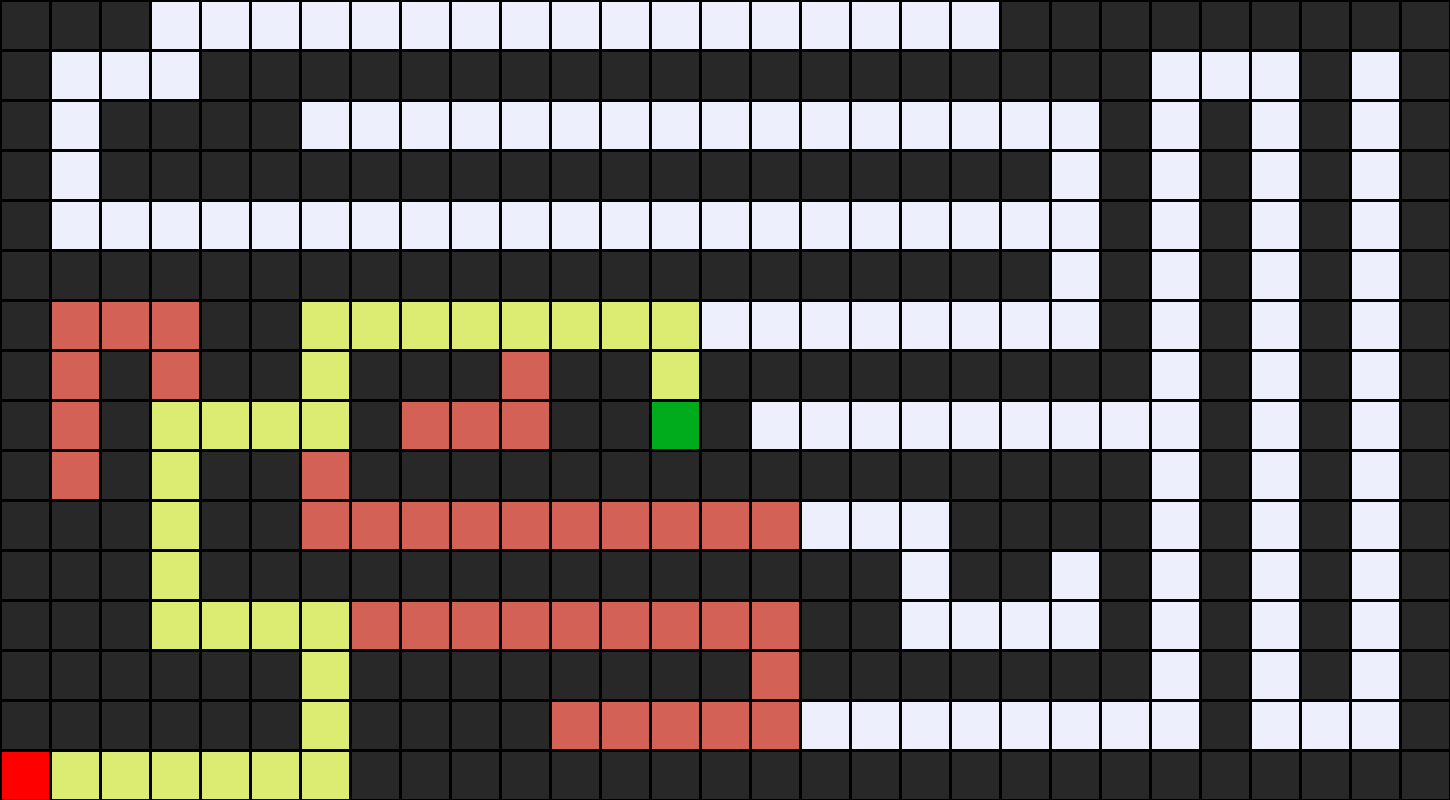

In [9]:
img = maze.output_image()
display(img)

In this case we can clearly see how the observed states are closer to the goal and origin and so there are less redundant observed squares

For developing an AI to play a game like TicTacToe, the design of the algorithm is quite similar. You start with an inital state (Empty Board) and recursively we simulate all possible games from that state. If we count how many we win and loose by doing each possible movements, we obtain a list of outcomes.
If interested, CS50 goes in depth into how developing this and has it is part of the problem set. Check it out at: 

https://cs50.harvard.edu/ai/2023/projects/0/tictactoe/

### Knowledge

Now we'll go into how can we describe knowledge in a computer and how to deduce more information from it.

The easiest way to represent it is via letters and symbols, where these have some meaning and relationships. The standard notation is:

* P -> It is raining
* Q -> I'm Indoors

So if we say
* P -> Q

we mean: "If it is raining, I'm indoors"

This is called implication. We join two variables so that if one is true, the other one is also true.

There are also biconditionals(<->), where if either are true, the other also has to be true

¬ means "not" so inverts all values it precedes. So:

| P | ¬P |
|---|---|
|True|False|
|False|True|

^ means "and" and so for the result to be true, both parts must be true:

|P|Q|P^Q|
|-|-|-|
|False|False|False|
|False|True|False|
|True|False|False|
|True|True|True|

V means "Or", so for the result to be true, either of its parts has to be true:


|P|Q|PvQ|
|-|-|-|
|False|False|False|
|False|True|True|
|True|False|True|
|True|True|True|

Now that we have established some notation, we can start doing something called inference, which is the process by which we can derive new information from the knowledge base.

This would be done by establishing the knowledge base first, where we can say:

P: It is a tuesday
Q: It is raining
R: Harry will go for a run

(P^¬Q) -> R 

So: if it is a tuesday and it is not raining, harry will go for a run.

The process from which in a computer we can specify data and deduce new one is well explained in code in CS50AI, if your project has to do with this type of AI, you can check the link below to keep exploring this chapter.

https://cs50.harvard.edu/ai/2024/notes/1/

### Uncertainty 

What if you know some thing about data but you're never certain of the outcome? For example, what if you know preassure, humidity, dew point,... and wanted to know if it was gonna rain? This is where statistics comes in.



Let's imagine we got some data and got that 10% of the days it rains in the afternoon and 